<a href="https://colab.research.google.com/github/ScarrryMary/IT_MIPT_group25-26/blob/main/2_semester/Seminar2_2_25_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

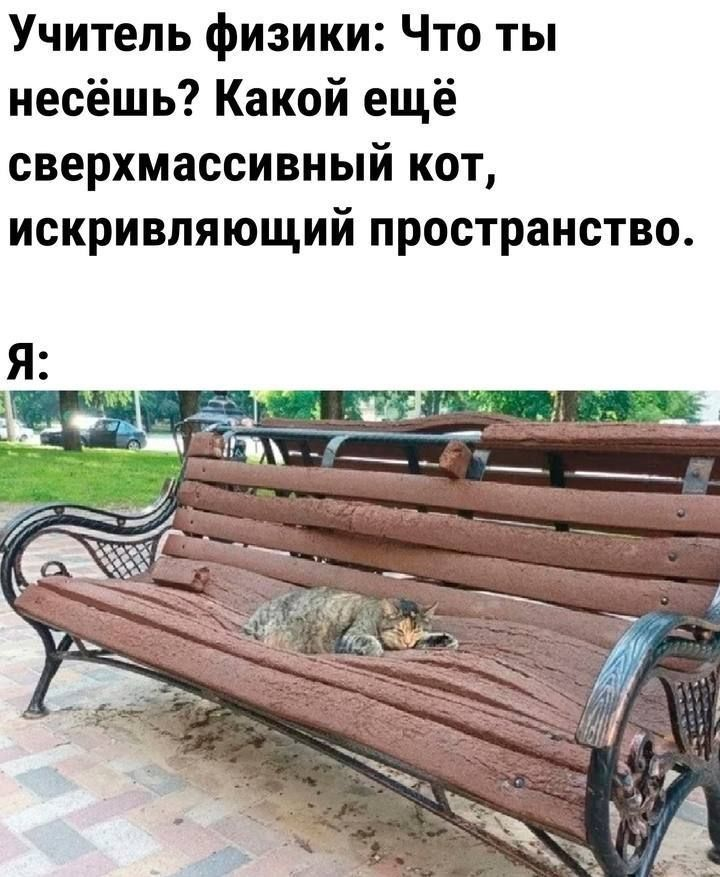

# Вспоминаем немного определений

- Связный граф - граф, между любыми вершинами которого существует маршрут
- Компонента связности - максимальный по включению подграф графа.

По количеству запусков DFS можно понять, сколько компонент связности в графе
- DFS из вершины $v$ посещает ВСЕ вершины, достижимые из $v$.

In [1]:
def dfs(v, visited, graph):
    visited[v] = True
    for to in graph[v]:
        if not visited[to]:
            dfs(to, visited, graph)

def components_count(graph):
    n = len(graph)
    visited = [False] * n
    count = 0  # ← СЧЕТЧИК КОМПОНЕНТ

    for i in range(n):
        if not visited[i]:  # Новая компонента!
            dfs(i, visited, graph)
            count += 1  # ← +1 ЗАПУСК = +1 КОМПОНЕНТА

    return count

In [3]:
graph = [
    [1, 2],    # 0 → 1, 2 (компонента 1)
    [0],       # 1 → 0
    [0],       # 2 → 0
    [4],       # 3 → 4 (компонента 2)
    [3],       # 4 → 3
    []         # 5 → ничего (компонента 3)
]

print("Граф:")
for i, neighbors in enumerate(graph):
    print(f"  {i}: {neighbors}")

result = components_count(graph)
print(result)

Граф:
  0: [1, 2]
  1: [0]
  2: [0]
  3: [4]
  4: [3]
  5: []
3


Вспомним алгоритм DFS:
1. Начать с вершины $u$
2. Покрасить в серый
3. Посетить белых соседей вершины $u$ (рекурсивно)
4. Окрасить вершину $u$ в черный.

=> Возможна проверка на ацикличность:
Когда нашли уже серого соседа - нашли цикл

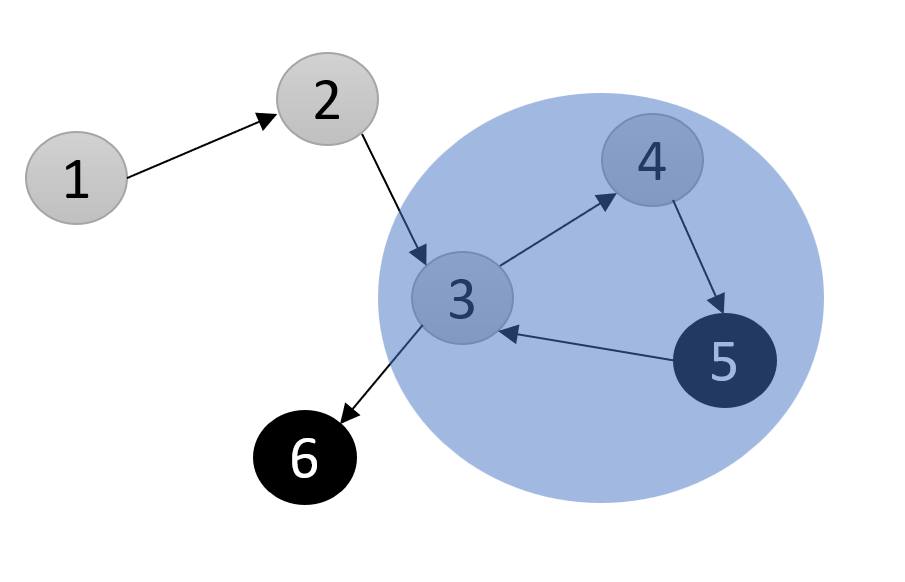

# Сортировки are back! Топологическая сортировка

Для данного ориентированного ациклического графа (Directed Acyclic Graph == DAG) задача состоит в том, чтобы найти линейный порядок его вершин так, чтобы для любого направленного ребра u -> v вершина u появлялась перед v в порядке.


Топологическая сортировка — это метод, используемый для организации вершин DAG в последовательности, учитывающей все зависимости. Она гарантирует, что ни одна вершина не появляется перед каким-либо из своих предварительных условий.

Граф не должен содержать циклов.
Если есть цикл — топологическая сортировка невозможна, потому что возникает противоречие в порядке следования вершин.

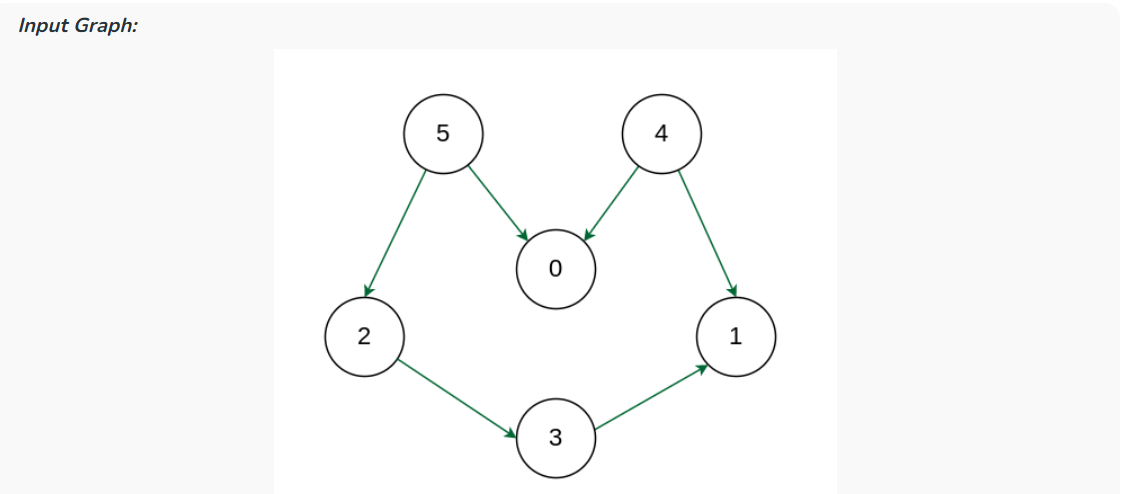

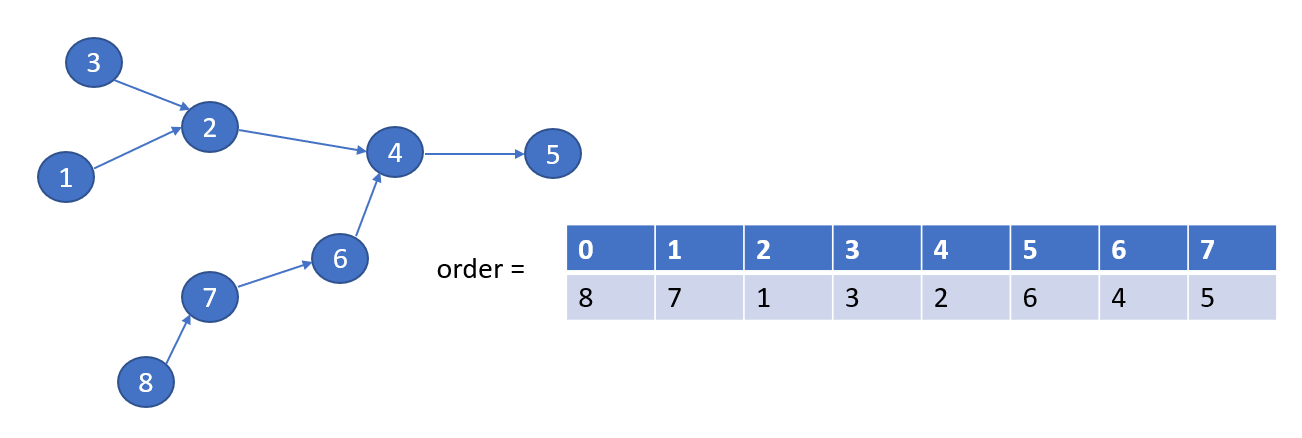

### Два основных алгоритма

1. Алгоритм Кана (очереди с нулевыми входящими)
```python
1. Находим все вершины с in_degree=0 (нет входящих рёбер)
2. Кладём их в очередь
3. Пока очередь не пуста:
   a) Берём u из очереди
   b) Добавляем u в результат
   c) Для каждого соседа v: in_degree[v]--
   d) Если in_degree[v] == 0 → в очередь
4. Если |результат| == n → топосорт ✓, иначе цикл ✗
```
**Сложность**: $O(V+E)$

In [31]:
def topological_sort_kahn(graph):
    n = len(graph)
    in_degree = [0] * n

    # 1. ТОЧНЫЙ подсчёт входящих
    for u in range(n):
        for v in graph[u]:
            in_degree[v] += 1  # ✅ Все рёбра учтены

    print(f"in_degree: {in_degree}")  # DEBUG

    # 2. Начальная очередь
    queue = [i for i in range(n) if in_degree[i] == 0]
    print(f"Очередь: {queue}")  # DEBUG

    order = []

    while queue:
        u = queue.pop(0)
        order.append(u)

        for v in graph[u]:
            in_degree[v] -= 1
            if in_degree[v] == 0:
                queue.append(v)

    # 3. ПРОВЕРКА цикла
    if len(order) == n:
        return order
    else:
        return None, f"Цикл! Обработано {len(order)}/{n} вершин"

# Тест
graph = [[1], [3,4], [], [], []]
result = topological_sort_kahn(graph)
print("Результат:", result)


in_degree: [0, 1, 0, 1, 1]
Очередь: [0, 2]
Результат: [0, 2, 1, 3, 4]


In [36]:
from collections import defaultdict, deque

class Graph:
    def __init__(self, vertices):
        self.graph = defaultdict(list)
        self.V = vertices

    def addEdge(self, u, v):
        self.graph[u].append(v)

    # Function to perform Kahn's Algorithm
    def topologicalSort(self):
        in_degree = [0] * self.V  # Count of incoming edges for each vertex

        # Calculate in-degree for each vertex
        for u in self.graph:
            for v in self.graph[u]:
                in_degree[v] += 1

        # Queue for vertices with 0 in-degree
        queue = deque([i for i in range(self.V) if in_degree[i] == 0])
        topo_order = []

        while queue:
            u = queue.popleft()
            topo_order.append(u)

            # Decrease in-degree for adjacent vertices
            for v in self.graph[u]:
                in_degree[v] -= 1
                if in_degree[v] == 0:
                    queue.append(v)

        print(topo_order)

g = Graph(5)
g.addEdge(0, 1)
g.addEdge(1, 3)
g.addEdge(1, 4)

g.topologicalSort()

[0, 2, 1, 3, 4]


2. Через DFS

In [28]:
def topological_sort_dfs(graph):
    n = len(graph)
    visited = [False] * n
    order = []

    def dfs(v):
        visited[v] = True
        for to in graph[v]:
            if not visited[to]:
                dfs(to)
        order.append(v)

    for i in range(n):
        if not visited[i]:
            dfs(i)

    return order[::-1]  # Обратный порядок завершения

# Пример
graph = [[1], [3,4], [], [], []]
result = topological_sort_dfs(graph)
print(result)


[2, 0, 1, 4, 3]


Топологическая сортировка НЕ уникальна — существует множество корректных порядков!

1. [0, 2, 4, 1, 3]  ← Кан
2. [2, 0, 4, 1, 3]  
3. [0, 4, 2, 1, 3]  
4. [0, 2, 1, 4, 3]  
5. [2, 0, 1, 4, 3]  ← DFS (зависит от порядка обхода)
6. [0, 4, 1, 2, 3]  


In [34]:
def is_valid_topo(graph, order):
    pos = {v: i for i, v in enumerate(order)}
    for u in range(len(graph)):
        for v in graph[u]:
            if pos[u] >= pos[v]:  # u должна быть ДО v
                return False
    return True

graph = [[1], [3,4], [], [], []]
kahn_order = [0, 2, 1, 3, 4]      # Кан
dfs_order  = [2, 0, 1, 4, 3]      # DFS

print(is_valid_topo(graph, kahn_order))
print(is_valid_topo(graph, dfs_order))


True
True


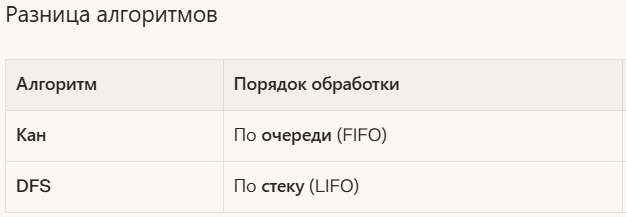

! Топологическая сортировка уникальна ⇔ на каждом шаге алгоритма Кана очередь содержит ровно 1 вершину !

# Волновой алгоритм (алгоритм Ли)

Волновой алгоритм (алгоритм Ли) — это способ найти кратчайший путь в лабиринте/на сетке (2D-матрице), если ходить можно, например, вверх/вниз/влево/вправо. Он работает так же, как **поиск в ширину (BFS)**: от старта «расходится волна» на соседние клетки, помечая расстояния.


Результат работы волнового алгоритма (ортогональный путь):

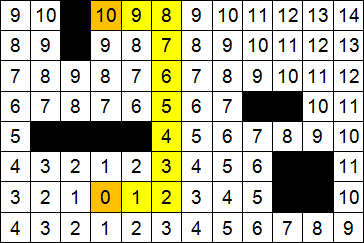

Результат работы волнового алгоритма (ортогонально-диагональный путь):

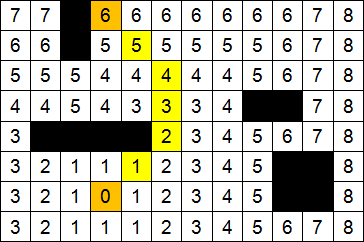

### Три этапа алгоритма
1. **Инициализация**: помечаем стартовую клетку как 0, остальные — «не посещены», стены — «нельзя».
​

2. **Распространение волны**: на каждом шаге фронт волны расширяется на свободные клетки-соседи, которым присваивается метка на 1 больше.

3. **Восстановление пути**: если финиш достигнут, идём от финиша назад, каждый раз выбирая соседа с меткой на 1 меньше, пока не придём в старт.

### Когда путь существует и что алгоритм гарантирует
Если волна дошла до финиша — путь существует, причём найденный путь будет кратчайшим по числу шагов (для равных “цен” переходов между клетками).

Если волна не может расширяться и финиш не помечен — пути нет.

### Сложность
На сетке $R×C$ каждая клетка становится частью волны максимум один раз, поэтому время обычно $O(R⋅C)$, память — тоже $O(R⋅C)$ на хранение меток расстояний. (Это следует из BFS-логики «не посещать клетку повторно».)

Пусть S — старт, G — цель, # — стена:
```python
S . . #
. # . .
. . . G
```





### Пример:
```python
S..#......
#.#.#.####.
..#...#...
.###.#.#..
...#.#.#..
.###.#....
....###.##
##..#.....
..#...###.
...#....G.
```


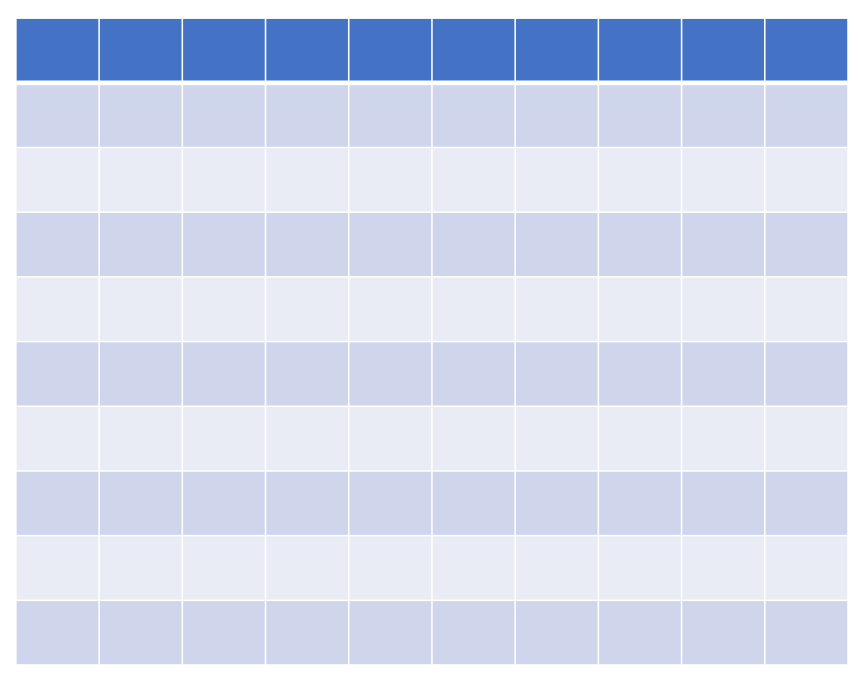

Таблица расстояний для строк 0-3 (первые шаги волны):

```python
 S  1  2  #  4  5  6  7  8  9
 #  2  3  #  5  #  #  #  # 10
 3  2  #  4  5  #  6  7  8  9
 4  #  #  #  6  #  7  #  9 10
```

In [3]:
def wave_algorithm(grid, start, goal):
    """
    Волновой алгоритм (алгоритм Ли) для поиска кратчайшего пути в сетке
    grid: список строк ('S' - старт, 'G' - цель, '#' - стена, '.' - свободно)
    start, goal: кортежи (row, col)
    Возвращает: список координат пути или None
    """
    rows = len(grid)
    cols = len(grid[0])

    # 1. Массив расстояний (волновые метки)
    dist = [[-1 for _ in range(cols)] for _ in range(rows)]
    # 2. Предшественники для восстановления пути
    parent = [[None for _ in range(cols)] for _ in range(rows)]

    # Направления: вверх, вниз, влево, вправо (4 направления)
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    # Этап 1: инициализация
    dist[start[0]][start[1]] = 0
    queue = [(start[0], start[1])]

    # Этап 2: распространение волны
    while queue:
        x, y = queue.pop(0)

        for dx, dy in directions:
            nx, ny = x + dx, y + dy

            # Проверяем границы, стену и посещение
            if (0 <= nx < rows and 0 <= ny < cols and
                grid[nx][ny] != '#' and dist[nx][ny] == -1):

                dist[nx][ny] = dist[x][y] + 1
                parent[nx][ny] = (x, y)
                queue.append((nx, ny))

    # Этап 3: проверяем достижимость цели
    if dist[goal[0]][goal[1]] == -1:
        return None

    # Восстанавливаем путь от цели к старту
    path = []
    current = goal
    while current is not None:
        path.append(current)
        current = parent[current[0]][current[1]]

    return path[::-1]

In [10]:
grid = [
    "S..#......",
    "#..#.####.",
    "..#...#...",
    ".###.#.#..",
    "...#.#.#..",
    ".###.#....",
    "....###.##",
    "##..#.....",
    "..#..... .",
    "...#....G."
]

start = (0, 0)
goal = (9, 9)
path = wave_algorithm(grid, start, goal)

if path:
    print(f"Путь найден! Длина: {len(path)-1}")
    print("Координаты пути:", path)

    # Печатаем сетку с путем
    for i in range(len(grid)):
        row = list(grid[i])
        if (i, path[0][1]) in path:  # Первая клетка пути
            row[path[0][1]] = '*'
        for j, (x, y) in enumerate(path[1:], 1):
            if i == x:
                row[y] = '*'
        print(''.join(row))
else:
    print(" Путь не найден!")

Путь найден! Длина: 20
Координаты пути: [(0, 0), (0, 1), (1, 1), (2, 1), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (6, 1), (6, 2), (7, 2), (7, 3), (8, 3), (8, 4), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9)]
**.#......
#*.#.####.
**#...#...
*###.#.#..
*..#.#.#..
*###.#....
***.###.##
##**#.....
..#**... .
...#******


# Поиск кратчайшего пути  


## Алгоритм Дейкстры  

Имея граф и исходную вершину в графе, найдите самые короткие пути от источника ко всем вершинам в данном графе. Алгоритм Дейкстры — популярный алгоритм для решения многих задач с одним источником на короткий путь с неотрицательным весом рёбер в графах, то есть он предназначен для поиска самого короткого расстояния между двумя вершинами на графе. Он был задуман голландским компьютерным учёным Эдсгером В. Дейкстрой в 1956 году.

Существует два основных варианта алгоритма, время работы которых составляет $O(n^2)$ и $O(mlogn)$, где $n$ — число вершин, а $m$ — число ребер.

Заведём массив $d$, в котором для каждой вершины $v$ будем хранить текущую длину $d_v$ кратчайшего пути из s в v. Изначально
$d_s = 0$, а для всех остальных вершин расстояние равно бесконечности (или любому числу, которое заведомо больше максимально возможного расстояния).

Во время работы алгоритма мы будем постепенно обновлять этот массив, находя более оптимальные пути к вершинам и уменьшая расстояние до них. Когда мы узнаем, что найденный путь до какой-то вершины v оптимальный, мы будем помечать эту вершину, поставив единицу ($a_v = 1$) в специальном массиве $a$, изначально заполненном нулями.

Сам алгоритм состоит из n итераций, на каждой из которых выбирается вершина $v$ с наименьшей величиной $d_v$ среди ещё не помеченных.

Выбранная вершина отмечается в массиве $a$, после чего из из вершины $v$ производятся релаксации: просматриваем все исходящие рёбра $(v,u)$ и для каждой такой вершины $u$ пытаемся улучшить значение $d_u$, выполнив присвоение $d_u = min(d_u,d_v + w)$ где $w$ — длина ребра $(v,u)$.

Итак,   
**Задача**: В (связном) взвешенном графе найти кратчайшие пути от вершины start до остальных

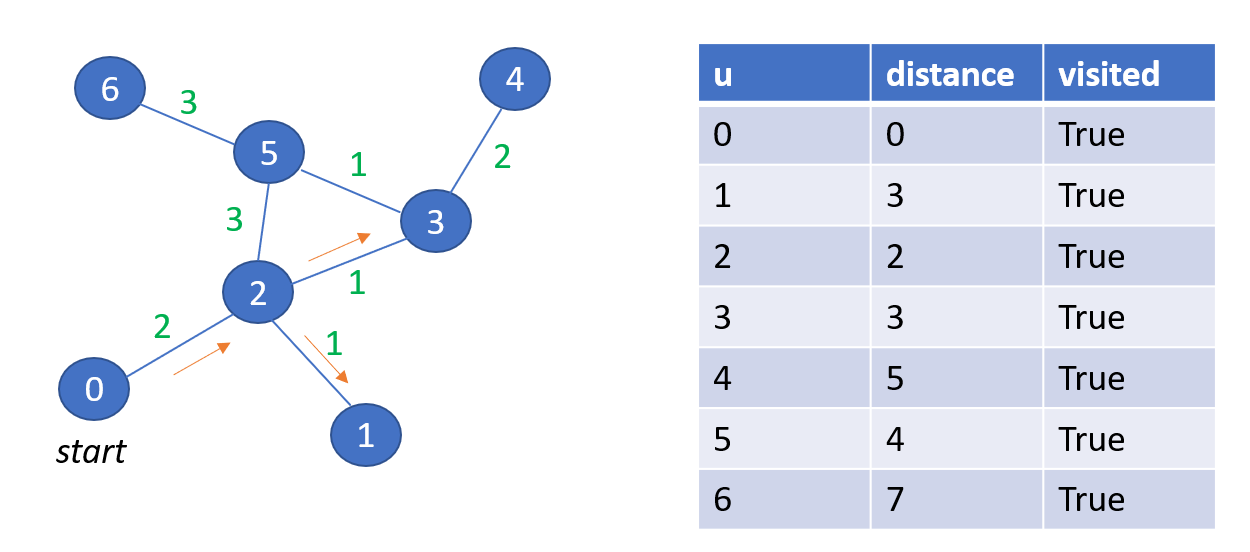

Алгоритм:  
1. ***Инициализация***:   
distance[start] = 0  
visited[u] = False для любой $u$ из графа $G$
2. ***Главный цикл***:  
2.1. Ищем необработанные вершины, для которых расстояние min, $u_{min}$  
2.2. Обработка $u_{min}$, улучшаем расстояние до её соседей  
2.3. Помечаем  $u_{min}$ как обработанную

+ Улучшенный вариант
1. Инициализируем очередь с приоритетом, все вершины кидаем в очередь.
2. Пока heapq не пуста:
```
# heapq — это куча, реализующая очередь с приоритетом
```
2.1. Вытаскиваем $u_{min}$ = heapq.heappop() --- ln(V)   
2.2. Обрабатываем $u_{min}$  
2.3. Если улучшили расстояние, добавляем вершину $v$ в очередь --- ln(V)  

3. --//--

=> Сложность улучшенной версии: $O(V + V⋅log V + E⋅log V) = O((V+E)⋅log(V))$

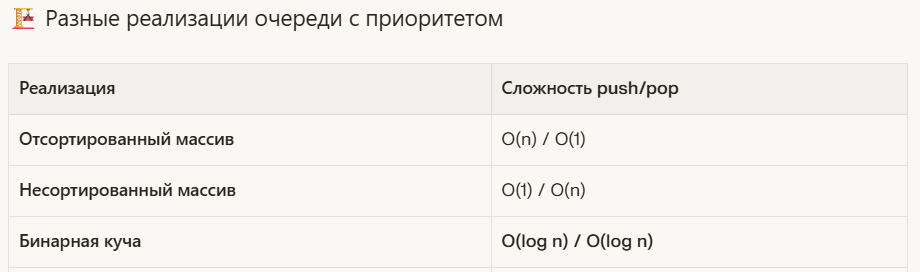

https://ru.algorithmica.org/cs/shortest-paths/dijkstra/ - классная гифка


In [4]:
def dijkstra_simple(graph, start):
    n = len(graph)
    dist = [float('inf')] * n
    dist[start] = 0
    used = [False] * n

    for _ in range(n):
        # Найти ближайшую
        u = -1
        min_d = float('inf')
        for i in range(n):
            if not used[i] and dist[i] < min_d:
                min_d = dist[i]
                u = i

        if u == -1: break
        used[u] = True

        # Обновить соседей
        for v, w in graph[u]:
            if dist[u] + w < dist[v]:
                dist[v] = dist[u] + w

    return dist

# Тест
graph = [[(1,7),(2,5),(3,3)], [(2,1),(4,2)], [(4,3)], [(2,2)], []]
print(dijkstra_simple(graph, 0))  # [0, 8, 5, 3, 6]


[0, 7, 5, 3, 8]


Классическая версия, сложность $O(V^2)$

In [6]:
import heapq

def dijkstra(graph, start):
    n = len(graph)
    dist = [float('inf')] * n
    dist[start] = 0

    # (расстояние, вершина)
    pq = [(0, start)]

    print(f"Поиск от вершины {start}")
    print("Шаг | dist | очередь | обновления")
    print("-" * 40)

    step = 0
    while pq:
        d, u = heapq.heappop(pq)
        step += 1

        if d > dist[u]:
            continue

        print(f"{step:2} | {dist} | pq: {pq} | взяли {u}(d={d})")

        for v, weight in graph[u]:
            old_dist = dist[v]
            new_dist = dist[u] + weight

            if new_dist < dist[v]:
                dist[v] = new_dist
                heapq.heappush(pq, (new_dist, v))
                print(f"    → {v}: {old_dist} → {new_dist}")

    return dist

# списки смежности [(сосед, вес), ...]
graph = [
    [(1, 7), (2, 5), (3, 3)],  # из 0
    [(2, 1), (4, 2)],          # из 1
    [(4, 3)],                  # из 2
    [(2, 2)],                  # из 3
    []                         # из 4
]

distances = dijkstra(graph, 0)
print(f"Кратчайшие расстояния от 0: {distances}")


Поиск от вершины 0
Шаг | dist | очередь | обновления
----------------------------------------
 1 | [0, inf, inf, inf, inf] | pq: [] | взяли 0(d=0)
    → 1: inf → 7
    → 2: inf → 5
    → 3: inf → 3
 2 | [0, 7, 5, 3, inf] | pq: [(5, 2), (7, 1)] | взяли 3(d=3)
 3 | [0, 7, 5, 3, inf] | pq: [(7, 1)] | взяли 2(d=5)
    → 4: inf → 8
 4 | [0, 7, 5, 3, 8] | pq: [(8, 4)] | взяли 1(d=7)
 5 | [0, 7, 5, 3, 8] | pq: [] | взяли 4(d=8)
Кратчайшие расстояния от 0: [0, 7, 5, 3, 8]


## Алгоритм Флойда-Уоршелла

Алгоритм Флойда-Уоршелла находит кратчайшие пути между **всеми** парами вершин за $O(V^3)$.

**Задача**: Во взвешенном графе найти длины кратчайших путей между **всевозможными** парами вершин   
**Ограничения**: Недопустимы циклы отрицательной длины. Цикл отрицательной длины — это замкнутый путь в графе, сумма весов рёбер которого отрицательна.

**Идея**: Возвращаемся к динамическому программированию: постепенно разрешаем пути через больше промежуточных вершин.
```python
dp[k][i][j] = кратчайший путь от i до j ИСПОЛЬЗУЯ ТОЛЬКО вершины 0..k
```
```python
dist[i][j] = min(
  dist[i][j],              # прямой путь
  dist[i][k] + dist[k][j]  # через промежуточную k
)
```
Для каждой k проверяем: "А не лучше ли идти через k?"

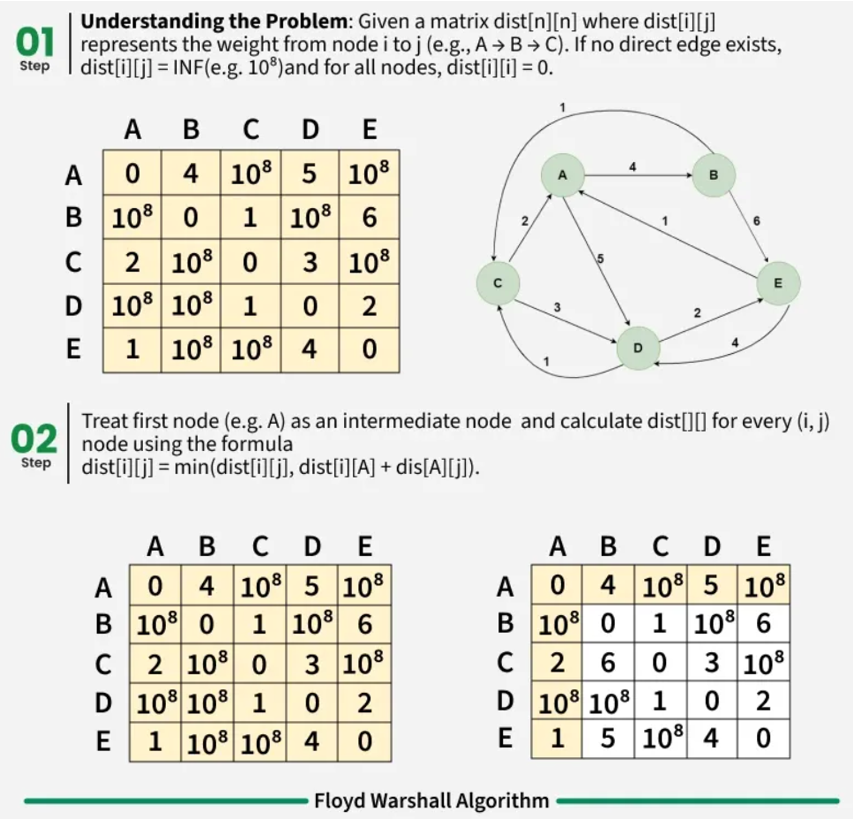

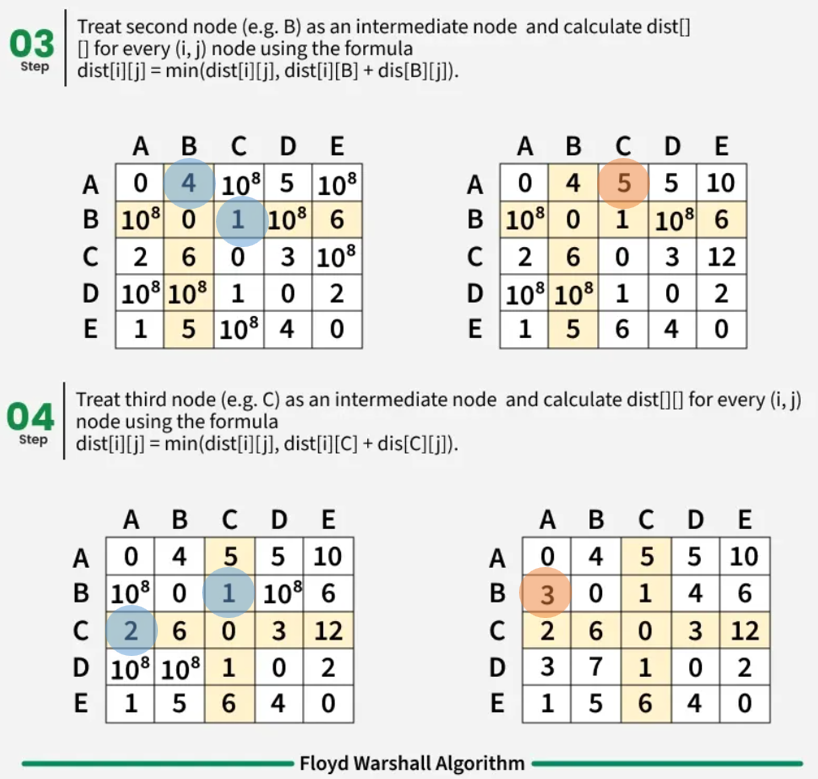

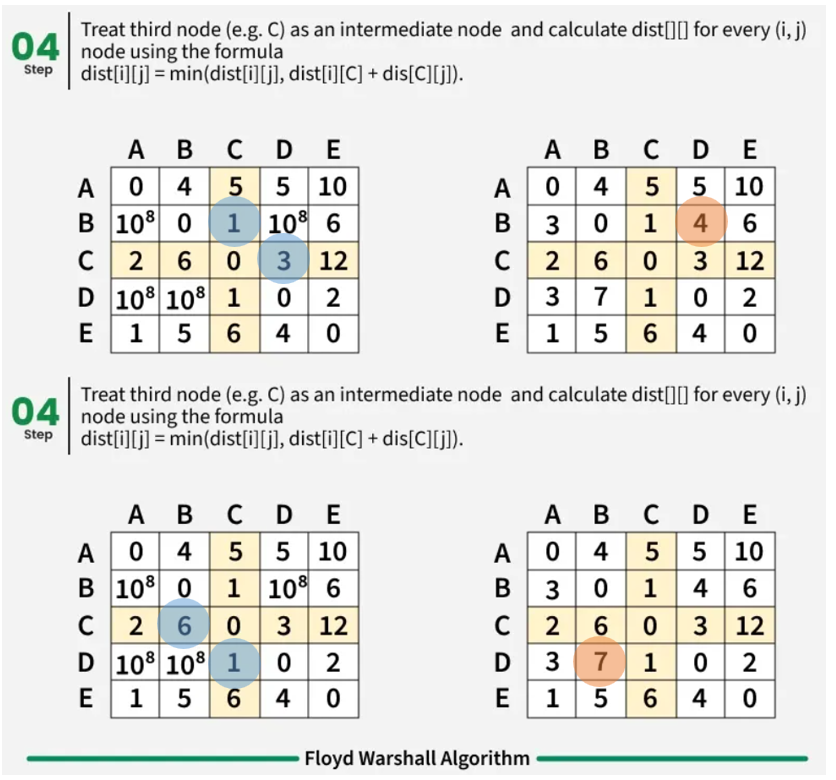

In [9]:
def floyd_warshall(graph):
    n = len(graph)
    dist = [row[:] for row in graph]  # копия матрицы

    # Для каждой промежуточной вершины k
    for k in range(n):
        print(f"Через вершину {k}:")
        for i in range(n):
            for j in range(n):
                # Путь через k лучше прямого?
                if dist[i][k] + dist[k][j] < dist[i][j]:
                    dist[i][j] = dist[i][k] + dist[k][j]
                    print(f"  {i}→{j}: {dist[i][j]} через {k}")

    return dist

INF = float('inf')
graph = [
    [0, 4, INF, 5, INF],
    [INF, 0, 1, INF, 6],
    [2, INF, 0, 3, INF],
    [INF, INF, 1, 0, 2],
    [1, INF, INF, 4, 0]
]

result = floyd_warshall(graph)
print("Финальные расстояния:")
for i in range(len(result)):
    print(f"{i}: {result[i]}")


Начальная матрица:
[0, 4, inf, 5, inf]
[inf, 0, 1, inf, 6]
[2, inf, 0, 3, inf]
[inf, inf, 1, 0, 2]
[1, inf, inf, 4, 0]
Через вершину 0:
  2→1: 6 через 0
  4→1: 5 через 0
Через вершину 1:
  0→2: 5 через 1
  0→4: 10 через 1
  2→4: 12 через 1
  4→2: 6 через 1
Через вершину 2:
  1→0: 3 через 2
  1→3: 4 через 2
  3→0: 3 через 2
  3→1: 7 через 2
Через вершину 3:
  0→4: 7 через 3
  2→4: 5 через 3
  4→2: 5 через 3
Через вершину 4:
Финальные расстояния:
0: [0, 4, 5, 5, 7]
1: [3, 0, 1, 4, 6]
2: [2, 6, 0, 3, 5]
3: [3, 7, 1, 0, 2]
4: [1, 5, 5, 4, 0]


Время: $O(V^3)$  
Память: $O(V^2)$

## Алгоритм Беллмана-Форда

Алгоритм Беллмана-Форда находит кратчайшие пути от одной вершины до всех остальных и работает с отрицательными весами (в отличие от Дейкстры).

**Алгоритм**:
1. Инициализация расстояний до всех вершин как бесконечные, а расстояние до исходной вершины — как 0.

2. Релаксация всех рёбер |V| - 1 раз.

3. Если мы можем найти более короткий путь, то в графе возникает отрицательный весовой цикл.

Релаксация:
```python
for _ in range(V-1):
    for каждое ребро (u,v,w):
        if dist[v] > dist[u] + w:
            dist[v] = dist[u] + w
```


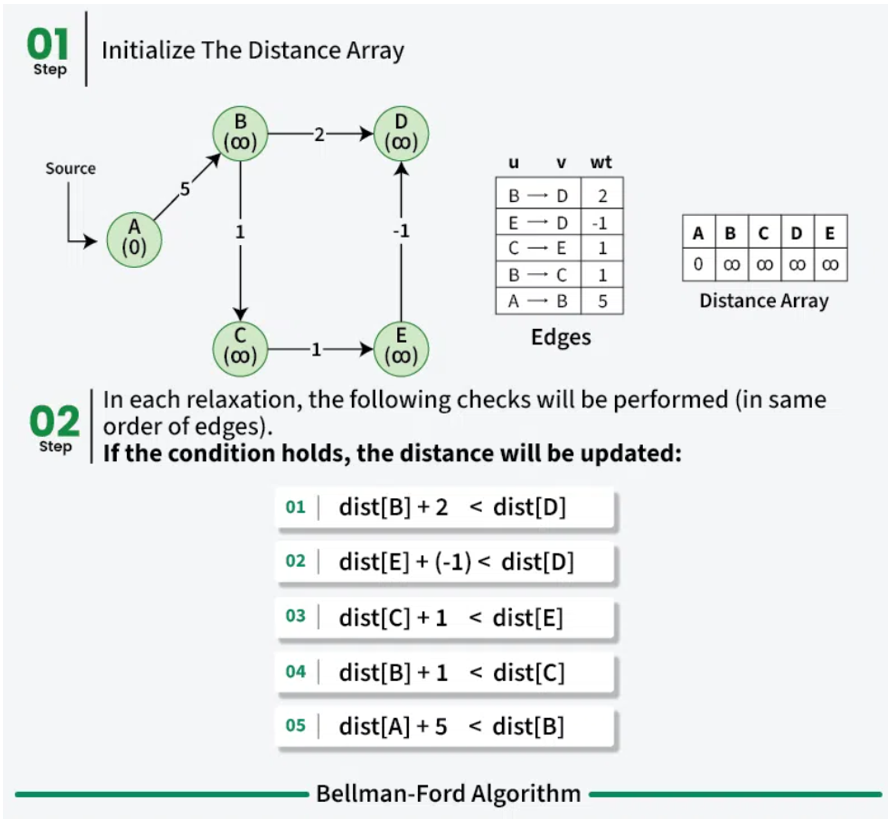

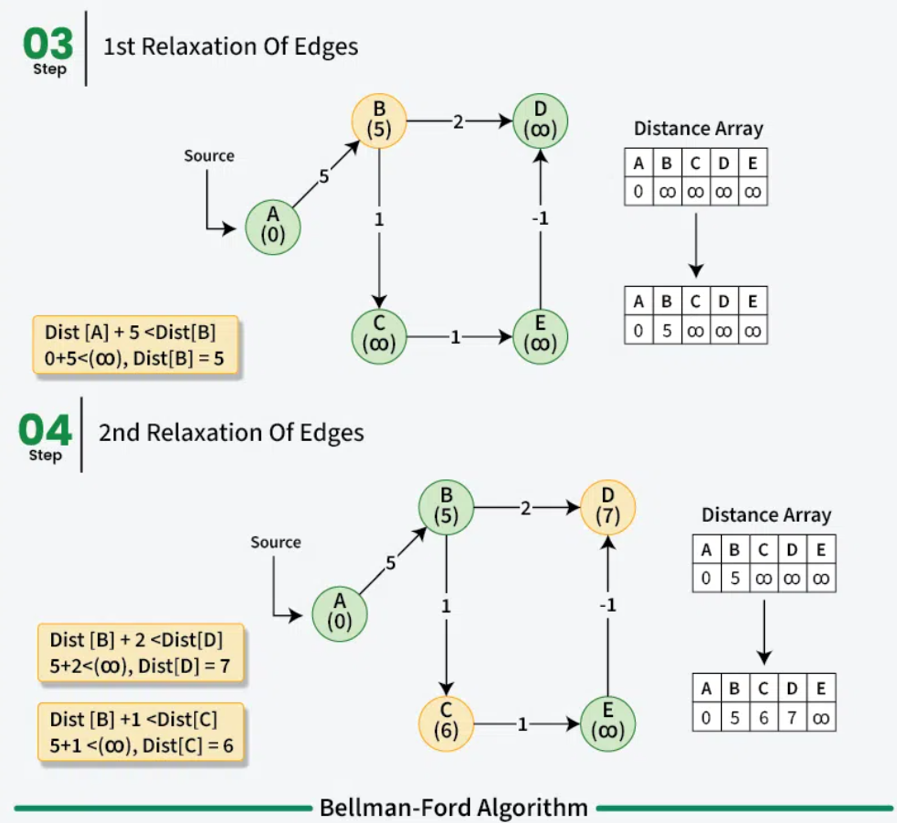

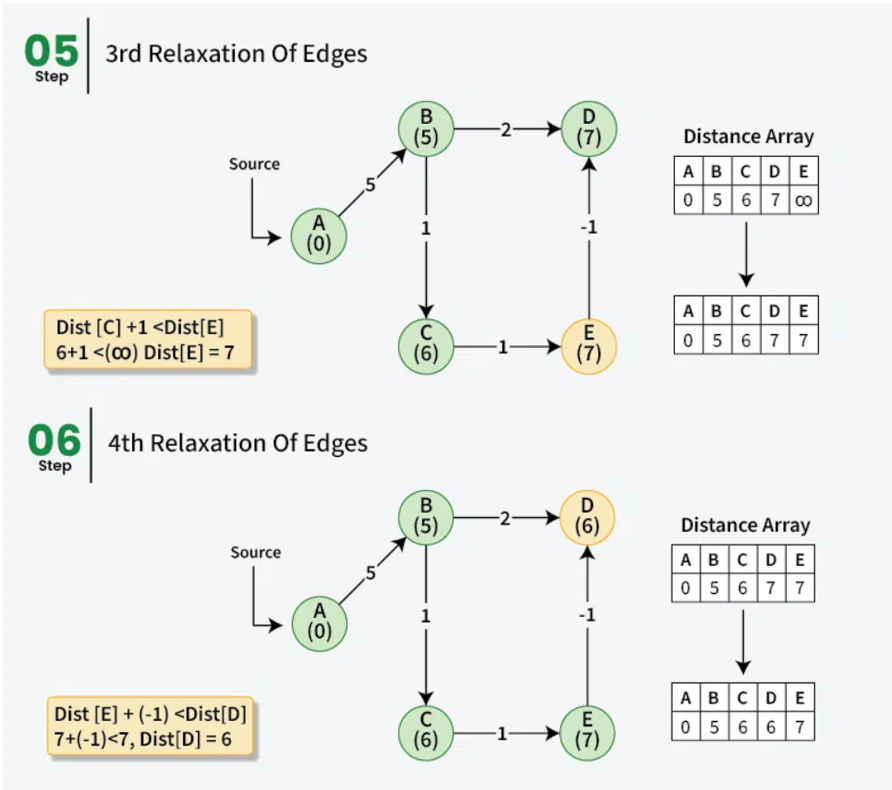

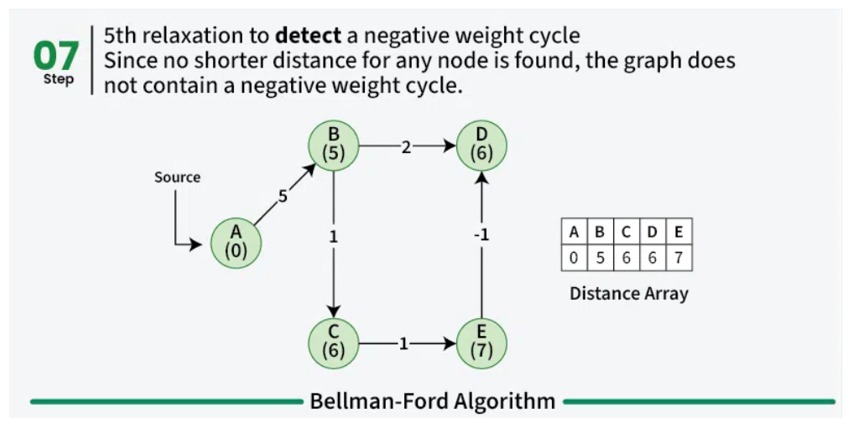

In [10]:
def bellman_ford(graph, source):
    # Step 1: Initialize distances
    distances = {vertex: float('inf') for vertex in graph}
    distances[source] = 0

    # Step 2: Relax edges |V| - 1 times
    for _ in range(len(graph) - 1):
        for u in graph:
            for v, weight in graph[u].items():
                if distances[u] != float('inf') and distances[u] + weight < distances[v]:
                    distances[v] = distances[u] + weight

    # Step 3: Check for negative weight cycles
    for u in graph:
        for v, weight in graph[u].items():
            if distances[u] != float('inf') and distances[u] + weight < distances[v]:
                raise ValueError("Graph contains negative weight cycle")

    return distances


# Example
graph = {
    'A': {'B': -1, 'C': 4},
    'B': {'C': 3, 'D': 2, 'E': 2},
    'C': {},
    'D': {'B': 1, 'C': 5},
    'E': {'D': -3}
}
source = 'A'

shortest_distances = bellman_ford(graph, source)
print(shortest_distances)

{'A': 0, 'B': -1, 'C': 2, 'D': -2, 'E': 1}


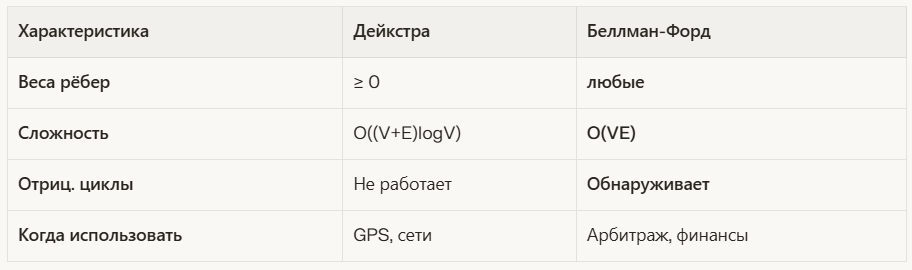